In [ ]:
!pip install transformers
!pip install torch
!pip install matplotlib

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load pre-trained model tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def visualize_attention(text, model, tokenizer):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt')

    # Get model outputs with attention
    outputs = model(**inputs)
    attention = outputs.attentions  # Get attention scores (tuple of tensors)

    # Average attention scores across all layers and heads
    # attention is a tuple of shape (num_layers, batch_size, num_heads, seq_len, seq_len)
    # We average across layers and heads to get a single attention matrix
    avg_attention = torch.mean(torch.cat(attention), dim=(0, 1))  # Shape: (seq_len, seq_len)

    # Plot the heatmap
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    plt.figure(figsize=(10, 6))
    plt.imshow(avg_attention.detach().numpy(), cmap='viridis', aspect='auto')
    plt.xticks(range(len(tokens)), tokens, rotation=90)
    plt.yticks(range(len(tokens)), tokens)
    plt.colorbar()
    plt.show()

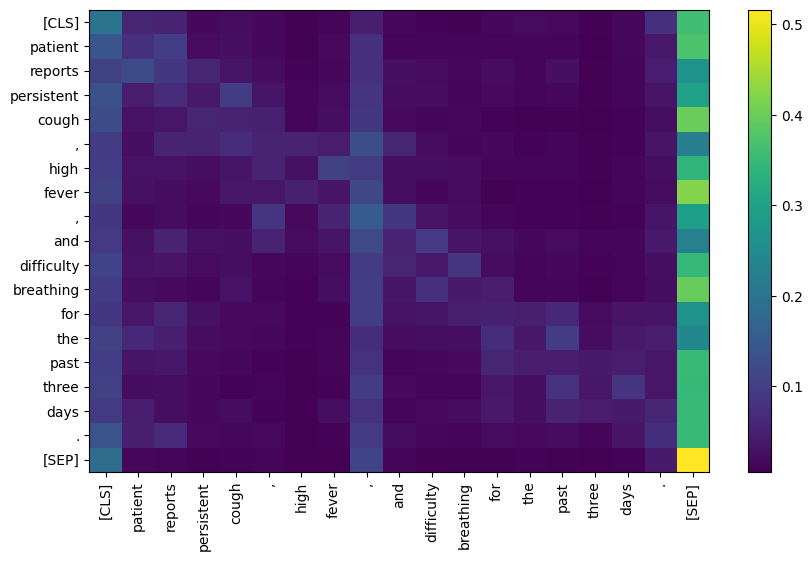

In [ ]:
text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
visualize_attention(text1, model, tokenizer)

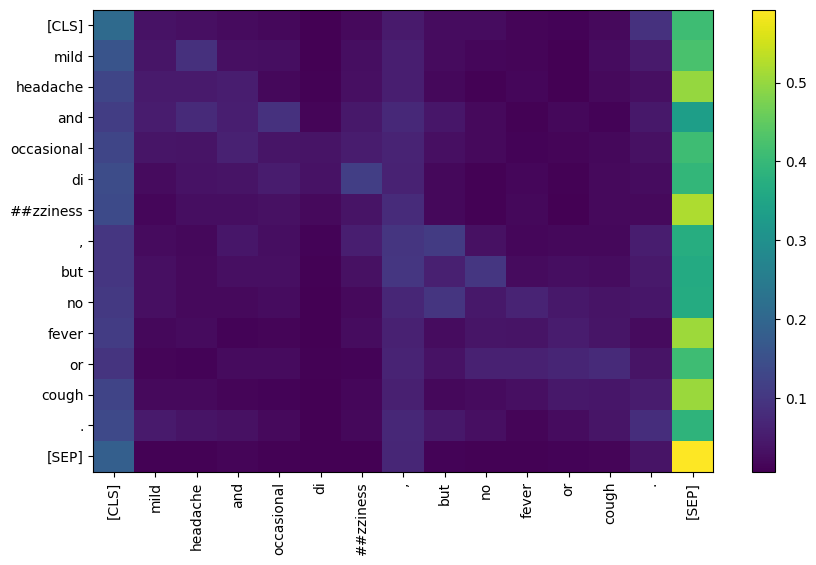

In [ ]:
text2 = "Mild headache and occasional dizziness, but no fever or cough."
visualize_attention(text2, model, tokenizer)

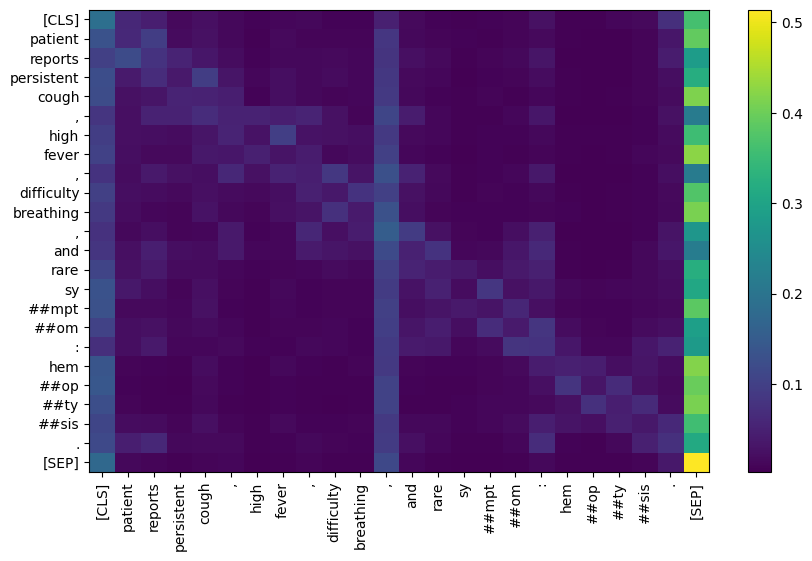

In [ ]:
text3 = "Patient reports persistent cough, high fever, difficulty breathing, and rare symptom: hemoptysis."
visualize_attention(text3, model, tokenizer)